<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/Day10_Ch12(%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%26%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍷 와인 데이터 분석 프로젝트: 회귀와 분류

이번 통합 실습 프로젝트에서는 **와인(Wine) 데이터셋** 하나를 가지고 지도 학습의 두 가지 핵심 과제인 **회귀(Regression)**와 **분류(Classification)**를 모두 경험합니다. '와인의 화학 성분'이라는 동일한 특성(Feature) 데이터를 사용하여, 한 번은 '알코올 도수'를 예측하는 회귀 모델을, 다른 한 번은 '와인의 품종'을 맞추는 분류 모델을 만들어 봅니다.

특히, 이전 학습한 **기초 통계(상관분석, 회귀분석)** 지식이 머신러닝에서 어떻게 확장되고 적용되는지 연결해 봅니다.

**🎯 프로젝트 목표:**

1.  **데이터 탐색(EDA)**: 실제 데이터를 시각화하여 변수 간의 관계를 탐색하고, 분석 방향에 대한 인사이트를 얻습니다.
2.  **회귀 모델링**: 알코올 도수를 예측하는 모델을 만듭니다. 이때 **통계적 관점(statsmodels)**과 **머신러닝 관점(scikit-learn)**의 차이를 이해하고, **R2**, **MAE**, **RMSE**로 성능을 평가합니다.
3.  **분류 모델링**: 와인 품종을 예측하는 모델(로지스틱 회귀, 랜덤 포레스트)을 만들고, **정확도**와 **혼동 행렬**로 성능을 평가합니다.
4.  **결과 해석**: '특성 중요도'를 통해 두 문제에서 어떤 변수가 예측에 중요하게 사용되었는지 비교 분석하고, 최종 결론을 도출합니다.


## 사전 준비: 라이브러리 및 데이터 로드

scikit-learn에 내장된 와인(Wine) 데이터셋을 사용합니다. 이 데이터는 별도의 정제 과정 없이 바로 사용할 수 있을 정도로 깨끗합니다.


In [19]:
# 필요 라이브러리 설치
# !pip install scikit-learn seaborn statsmodels

# 코랩에서 한글 폰트 사용을 위한 설정 (필요 시 주석 해제 후 실행)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [20]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # 통계적 회귀 분석을 위한 라이브러리

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False



# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [21]:
# 1. scikit-learn에서 와인 데이터셋 로드
wine = load_wine()

# 2. 데이터프레임으로 변환
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
data['target'] = wine.target

print("와인 데이터 준비 완료!")
print("데이터 크기:", data.shape)
data.head()


와인 데이터 준비 완료!
데이터 크기: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Part 1: 데이터 탐험 및 문제 정의

> **🎯 목표:** 데이터를 본격적으로 분석하기 전에, 데이터의 기본적인 구조와 변수 간의 관계를 시각적으로 탐색하고, 우리가 해결할 두 가지 문제를 명확히 정의합니다.


### 💡 핵심 개념:

**탐색적 데이터 분석(EDA, Exploratory Data Analysis)**은 데이터의 구조, 패턴, 이상치, 변수 간의 관계 등을 파악하기 위해 시각화와 기초 통계량을 활용하는 과정입니다. EDA를 통해 데이터에 대한 깊은 이해를 얻고, 이를 바탕으로 효과적인 분석 전략을 수립할 수 있습니다.


### 📌 수행 과제:

1.  `.info()`와 `.describe()`를 사용해 데이터의 기본 정보(데이터 타입, 결측치 유무)와 기술 통계량(평균, 표준편차 등)을 확인합니다.
2.  `seaborn`의 `pairplot`을 사용해 몇 가지 주요 변수들(`alcohol`, `flavanoids`, `proline`, `color_intensity`) 간의 관계를 시각적으로 탐색합니다.
3.  EDA 결과를 바탕으로, 우리가 이 데이터로 해결할 **회귀 문제**와 **분류 문제**를 각각 명확하게 정의합니다.


===== 데이터 정보 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null   

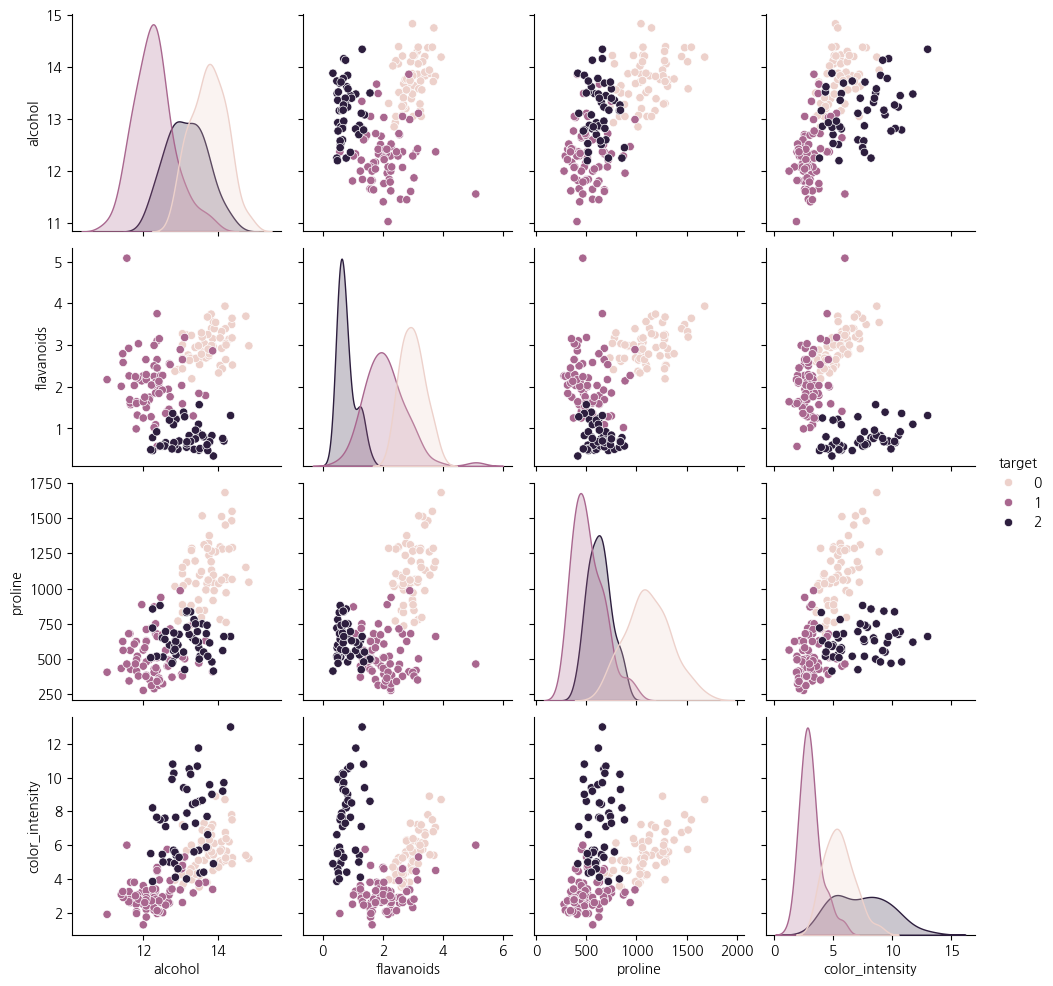

In [22]:
# TODO-1: 데이터프레임의 기본 정보와 기술 통계량 확인
print("===== 데이터 정보 =====")
data.info()

print("\n===== 기술 통계량 =====")
print(data.describe())


# TODO-2: pairplot 시각화
sns.pairplot(
    data[['alcohol', 'flavanoids', 'proline', 'color_intensity', 'target']],
    hue='target'
)
plt.show()


# 회귀 문제 정의 (Part 2):
# 와인의 화학 성분(alcohol, flavanoids, proline 등)을 독립변수로 사용하여
# 연속형 변수인 '알코올 도수(alcohol)'를 예측하는 회귀 문제를 해결한다.

# 분류 문제 정의 (Part 3):
# 동일한 화학 성분 데이터를 입력값으로 사용하여
# 와인의 품종(target: 0, 1, 2)을 예측하는 다중 분류 문제를 해결한다.


### 🤔 생각해 볼 문제:

1.  `pairplot`의 대각선에 위치한 히스토그램을 보면, `flavanoids`나 `proline` 같은 변수들이 품종(target)별로 뚜렷하게 구분되는 경향을 보이나요?
2.  `alcohol`과 다른 변수들 간의 산점도를 보면, 어떤 변수와 가장 뚜렷한 선형 관계를 보이는 것 같나요? (예: `color_intensity` 등)
3.  이 EDA 결과를 바탕으로, '연속된 숫자(알코올 도수)'를 맞추는 문제와 '정해진 종류(품종)'를 맞추는 문제 중 어떤 것이 더 직관적으로 다가오나요?

---

### 📢 발표 시 담으면 좋을 것들

Part 1을 맡은 팀은 **데이터 탐험가**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** EDA가 왜 중요한지, '데이터를 보기 전에 모델부터 만드는 것은 지도 없이 여행을 떠나는 것과 같다'는 비유를 들어 설명합니다.
2.  **분석 결과 공유:** `describe()` 결과를 통해 각 변수의 스케일이 제각각임을 보여주고, 이것이 왜 스케일링이 필요한지에 대한 단서가 되는지 설명합니다. `pairplot` 결과를 보여주며, 변수 간의 상관관계(회귀의 힌트)와 품종별 구분(분류의 힌트)을 발견한 내용을 공유합니다.




## 생각해 볼 문제 정리

1. 품종별 구분 여부
   pairplot의 대각선 히스토그램을 보면 flavanoids와 proline 변수는 품종별 분포가 비교적 뚜렷하게 나뉘는 경향을 보인다. 이는 해당 변수들이 와인 품종을 구분하는 데 중요한 특성이 될 수 있음을 의미한다.

2. 선형 관계가 뚜렷한 변수
   alcohol과 다른 변수들 간의 산점도를 살펴보면 color_intensity와 proline이 비교적 뚜렷한 관계를 보인다. 이는 알코올 도수를 예측하는 회귀 문제에서 해당 변수들이 주요 설명 변수가 될 가능성을 시사한다.

3. 더 직관적인 문제 유형
   EDA 결과를 종합하면 품종에 따라 명확하게 구분되는 변수가 존재하므로 품종을 맞추는 분류 문제가 알코올 도수를 예측하는 회귀 문제보다 더 직관적으로 느껴진다.

---

### 핵심 개념 설명

EDA는 데이터를 충분히 이해한 뒤 분석을 진행하기 위한 필수 단계이다. 데이터를 보기 전에 모델부터 만드는 것은 분석 방향을 잃을 수 있으며, EDA를 통해 데이터의 분포와 변수 간 관계를 사전에 파악함으로써 이후 모델링의 효율성과 해석력을 높일 수 있다.

### 분석 결과 공유

describe 결과를 통해 각 변수의 값 범위와 분산이 크게 다름을 확인할 수 있었고, 이는 모델 성능을 위해 스케일링이 필요하다는 점을 시사한다. pairplot 분석에서는 변수 간 상관관계가 회귀 문제에 대한 단서를 제공하고, 특정 변수들이 품종별로 구분되는 모습을 통해 분류 문제에 적합한 데이터임을 확인할 수 있었다.

---

### 종합 정리

이번 데이터 탐색을 통해 동일한 특성 데이터를 활용하여 회귀와 분류 문제를 모두 정의할 수 있었으며, EDA가 이후 분석 단계의 방향성을 결정하는 중요한 역할을 한다는 점을 확인하였다.


## Part 2: 알코올 도수 예측 모델링 (회귀)

> **🎯 목표:** 통계 부분에서 배운 회귀분석을 머신러닝으로 확장합니다. 선형 회귀와 랜덤 포레스트 모델을 만들고, 다양한 지표(R2, MAE, RMSE)로 성능을 평가합니다.


### 💡 핵심 개념: 통계적 회귀 vs 머신러닝 회귀

우리는 기초 통계 시간에 `p-value`를 통해 "이 변수가 결과에 유의미한 영향을 미치는가?"를 검정하는 데 집중했습니다. 이를 **설명(Explanation)**을 위한 모델링이라고 합니다.

반면, 머신러닝에서는 "새로운 데이터가 들어왔을 때 결과를 얼마나 잘 맞추는가?"에 집중합니다. 이를 **예측(Prediction)**을 위한 모델링이라고 합니다. 따라서 머신러닝에서는 `p-value`보다 실제값과 예측값의 차이인 **오차(Error)**를 줄이는 것이 가장 중요합니다.


### 📌 수행 과제:

1.  **데이터 준비**: 'alcohol'을 타겟(y)으로, 나머지를 특성(X)으로 정의하고 학습/테스트 데이터로 분리합니다.
2.  **통계적 분석**: `statsmodels`를 사용하여 통계적 관점에서 회귀 모델을 만들고, `summary()`를 통해 p-value를 확인해 봅니다.
3.  **머신러닝 모델링**:
    - **모델 A (선형 회귀)**: 데이터를 스케일링한 후 학습하고 성능을 평가합니다.
    - **모델 B-1 (의사 결정나무)**: 스케일링 없이 학습하고 성능을 평가합니다.
    - **모델 B-2 (랜덤 포레스트)**: 스케일링 없이 학습하고 성능을 평가합니다.
4.  **성능 평가 및 비교**: MSE, RMSE 뿐만 아니라 **MAE(평균 절대 오차)**, **R2 Score(결정 계수)**를 사용하여 모델을 다각도로 평가합니다.


                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     13.91
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           3.94e-18
Time:                        07:34:16   Log-Likelihood:                -113.89
No. Observations:                 142   AIC:                             253.8
Df Residuals:                     129   BIC:                             292.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

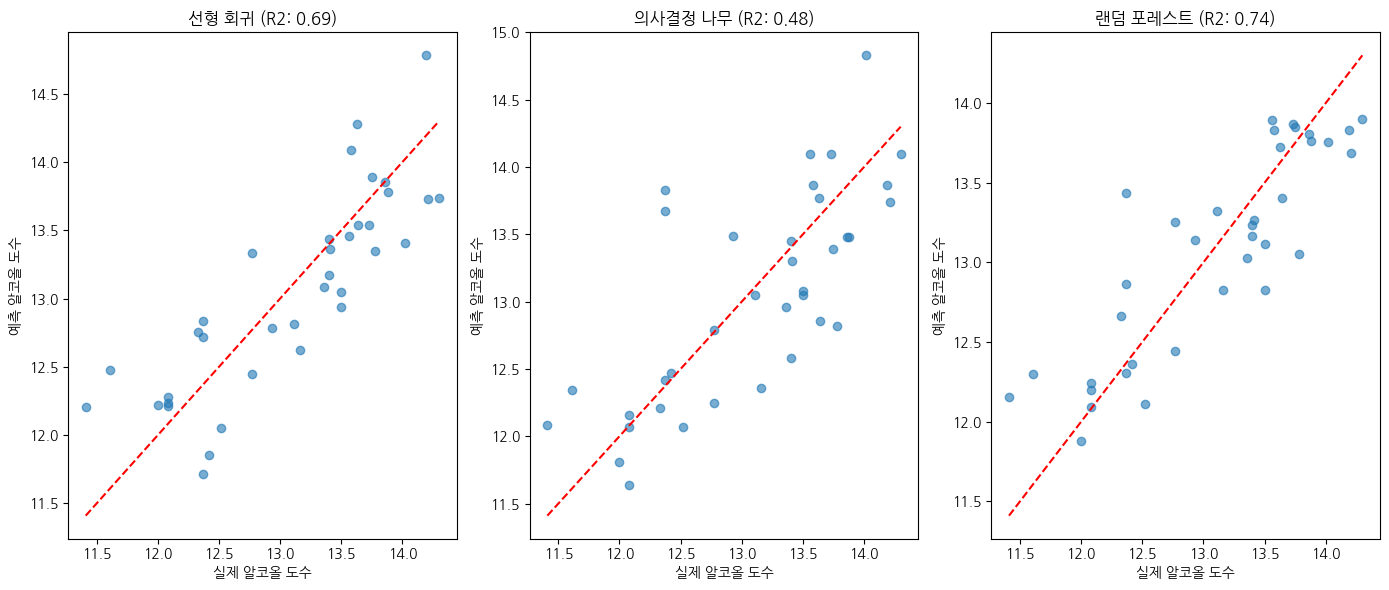

In [23]:
# =========================
# Part 2: 알코올 도수 예측 (회귀)
# =========================

# 1. 회귀 문제용 데이터 준비
X_reg = data.drop(columns=['alcohol', 'target'])
y_reg = data['alcohol']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# -------------------------
# 2. 통계적 관점: statsmodels
# -------------------------
X_train_stat = sm.add_constant(X_train_reg)
model_stat = sm.OLS(y_train_reg, X_train_stat).fit()

print(model_stat.summary())

# -------------------------
# 3. 머신러닝 관점
# -------------------------

# 모델 A: 선형 회귀 (스케일링 필요)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

model_lin = LinearRegression()
model_lin.fit(X_train_reg_scaled, y_train_reg)
pred_lin = model_lin.predict(X_test_reg_scaled)

# 모델 B-1: 의사결정 나무 회귀
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr.fit(X_train_reg, y_train_reg)
pred_dtr = model_dtr.predict(X_test_reg)

# 모델 B-2: 랜덤 포레스트 회귀
model_rfr = RandomForestRegressor(random_state=42)
model_rfr.fit(X_train_reg, y_train_reg)
pred_rfr = model_rfr.predict(X_test_reg)

# -------------------------
# 4. 성능 평가
# -------------------------
rmse_lin = np.sqrt(mean_squared_error(y_test_reg, pred_lin))
mae_lin = mean_absolute_error(y_test_reg, pred_lin)
r2_lin = r2_score(y_test_reg, pred_lin)

rmse_dtr = np.sqrt(mean_squared_error(y_test_reg, pred_dtr))
mae_dtr = mean_absolute_error(y_test_reg, pred_dtr)
r2_dtr = r2_score(y_test_reg, pred_dtr)

rmse_rfr = np.sqrt(mean_squared_error(y_test_reg, pred_rfr))
mae_rfr = mean_absolute_error(y_test_reg, pred_rfr)
r2_rfr = r2_score(y_test_reg, pred_rfr)

print("\n===== 머신러닝 회귀 모델 성능 비교 =====")
print(f"[선형 회귀] RMSE: {rmse_lin:.4f} | MAE: {mae_lin:.4f} | R2: {r2_lin:.4f}")
print(f"[의사결정 나무] RMSE: {rmse_dtr:.4f} | MAE: {mae_dtr:.4f} | R2: {r2_dtr:.4f}")
print(f"[랜덤 포레스트] RMSE: {rmse_rfr:.4f} | MAE: {mae_rfr:.4f} | R2: {r2_rfr:.4f}")

# -------------------------
# 5. 예측 결과 시각화
# -------------------------
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

axes[0].scatter(y_test_reg, pred_lin, alpha=0.6)
axes[0].plot([y_test_reg.min(), y_test_reg.max()],
             [y_test_reg.min(), y_test_reg.max()], 'r--')
axes[0].set_title(f'선형 회귀 (R2: {r2_lin:.2f})')
axes[0].set_xlabel('실제 알코올 도수')
axes[0].set_ylabel('예측 알코올 도수')

axes[1].scatter(y_test_reg, pred_dtr, alpha=0.6)
axes[1].plot([y_test_reg.min(), y_test_reg.max()],
             [y_test_reg.min(), y_test_reg.max()], 'r--')
axes[1].set_title(f'의사결정 나무 (R2: {r2_dtr:.2f})')
axes[1].set_xlabel('실제 알코올 도수')
axes[1].set_ylabel('예측 알코올 도수')

axes[2].scatter(y_test_reg, pred_rfr, alpha=0.6)
axes[2].plot([y_test_reg.min(), y_test_reg.max()],
             [y_test_reg.min(), y_test_reg.max()], 'r--')
axes[2].set_title(f'랜덤 포레스트 (R2: {r2_rfr:.2f})')
axes[2].set_xlabel('실제 알코올 도수')
axes[2].set_ylabel('예측 알코올 도수')

plt.tight_layout()
plt.show()


### 🤔 생각해 볼 문제:

1.  `statsmodels`의 결과(`P>|t|`)에서 통계적으로 유의미하지 않다고 나온 변수들은 무엇인가요? 이 변수들을 제거하면 머신러닝 모델의 성능이 오를까요, 내릴까요?
2.  **R2 Score(결정 계수)**는 1에 가까울수록 모델이 데이터를 잘 설명한다는 뜻입니다. 두 모델 중 어떤 모델의 설명력이 더 높은가요?
3.  **MAE(평균 절대 오차)**를 보면, 우리 모델은 알코올 도수를 평균적으로 몇 도 정도 틀리고 있나요? (예: 0.5도 차이)

---

### 📢 발표 시 담으면 좋을 것들

Part 2를 맡은 팀은 **회귀 모델러**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** 통계적 회귀(설명 중심)와 머신러닝 회귀(예측 중심)의 차이를 설명합니다.
2.  **평가지표 해석:** RMSE와 MAE, R$^2$의 차이를 설명합니다.
3.  **결과 해석:** 선형 회귀와 랜덤 포레스트의 성능 차이를 비교하고, 알코올 도수 예측에는 어떤 모델이 더 적합한지 결론을 내립니다.




## 생각해 볼 문제 정리

1. 통계적으로 유의미하지 않은 변수
   statsmodels 결과에서 p-value가 0.05보다 큰 변수들은 ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, hue, od280/od315_of_diluted_wines이다.
   이 변수들을 제거하면 통계적 해석 측면에서는 모델이 단순해질 수 있으나, 머신러닝 모델의 경우 반드시 성능이 향상된다고 보장할 수는 없다. 랜덤 포레스트와 같은 모델은 비선형 관계와 변수 간 상호작용을 활용하기 때문에 일부 유의하지 않은 변수도 예측 성능에 기여할 수 있다.

2. 설명력이 더 높은 모델
   R2 Score를 비교하면 선형 회귀 모델보다 랜덤 포레스트 모델의 R2 값이 더 높다. 이는 랜덤 포레스트가 데이터의 변동성을 더 잘 설명하고 있음을 의미한다.

3. 평균적으로 틀리는 알코올 도수
   MAE 기준으로 보면 선형 회귀는 평균적으로 약 0.37도, 랜덤 포레스트는 약 0.32도 정도 알코올 도수를 틀리고 있다. 즉, 랜덤 포레스트 모델이 더 정확한 예측을 수행한다.

---


### 핵심 개념 설명

통계적 회귀는 변수의 유의성과 해석 가능성에 초점을 맞춘 설명 중심의 분석이며, 머신러닝 회귀는 새로운 데이터에 대해 얼마나 정확하게 예측하는지를 중시하는 예측 중심의 분석이다. 따라서 머신러닝에서는 p-value보다 예측 오차를 줄이는 것이 더 중요하다.

### 평가지표 해석

RMSE는 큰 오차에 더 민감한 지표로 모델의 전반적인 안정성을 평가하는 데 유용하고, MAE는 평균적으로 얼마나 틀리는지를 직관적으로 보여준다. R2는 모델이 전체 변동성을 얼마나 설명하는지를 나타내는 지표이다.

### 결과 해석 및 결론

실험 결과, 랜덤 포레스트 모델은 선형 회귀보다 낮은 RMSE와 MAE, 더 높은 R2 값을 보였다. 이는 알코올 도수 예측 문제에서 변수 간의 복잡한 관계를 반영할 수 있는 랜덤 포레스트 모델이 더 적합하다는 것을 의미한다.


## Part 3: 와인 품종 분류 모델링 (분류)

> **🎯 목표:** 이제 연속된 숫자가 아닌, '품종(Class)'을 예측해 봅니다. 로지스틱 회귀와 랜덤 포레스트를 사용하며, 분류 문제만의 독특한 평가지표들을 익힙니다.


### 💡 핵심 개념 (보충): 랜덤 포레스트란? 🌳🌲🌳

앞서 회귀 문제에서도 사용했던 **랜덤 포레스트(Random Forest)**는 분류 문제에서도 매우 강력합니다. 여러 개의 **의사결정 나무(Decision Tree)**들이 모여 투표를 통해 결과를 결정하는 원리입니다.

1.  **회귀일 때:** 여러 나무들의 예측값의 **평균**을 사용.
2.  **분류일 때:** 여러 나무들의 예측 결과 중 **다수결**로 결정.

이처럼 앙상블(Ensemble) 모델은 다양한 문제에 유연하게 적용될 수 있습니다.


### 📌 수행 과제:

1.  분류 문제에 맞게 특성(X)과 타겟(y)을 정의하고, 학습/테스트 데이터로 분리합니다.
2.  **모델 C (로지스틱 회귀)**, **모델 D-1 (단일 의사결정 나무)**, **모델 D-2 (랜덤 포레스트)** 세 가지 모델을 모두 학습시키고 예측을 수행합니다.
3.  **종합 성능 평가**
    - 세 모델의 **정확도**를 비교합니다.
    - 세 모델의 **혼동 행렬**을 시각화하여 비교합니다.
    - 세 모델의 **분류 리포트(정밀도, 재현율, F1-점수)**를 비교하여, 어떤 모델이 각 품종을 얼마나 잘 예측하는지 심층 분석합니다.


===== 모델별 정확도 비교 =====
로지스틱 회귀: 0.9722
의사결정 나무: 0.9444
랜덤 포레스트: 1.0000


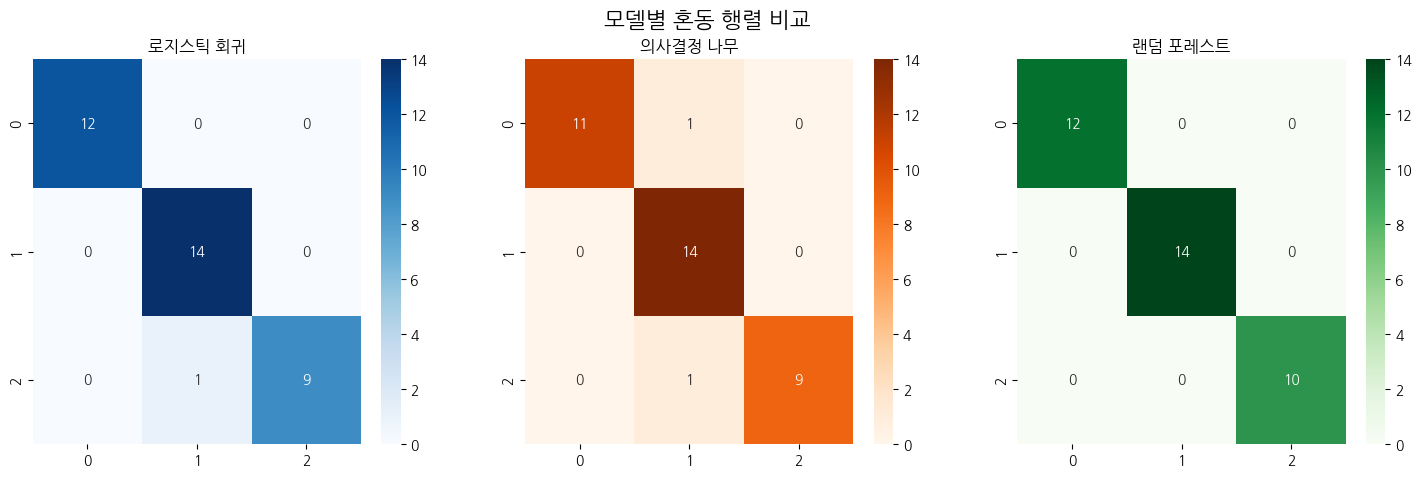


모델별 분류 리포트 비교

로지스틱 회귀
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


의사결정 나무
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36


랜덤 포레스트
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00

In [24]:
# =========================
# Part 3: 와인 품종 분류
# =========================

# 1. 분류 문제용 데이터 준비
# target을 예측 대상으로 설정
X_cls = data.drop(columns=['target'])   # 특성 변수
y_cls = data['target']                  # 타겟 변수

# 학습/테스트 데이터 분리 (클래스 비율 유지)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# -------------------------
# 모델 C: 로지스틱 회귀
# -------------------------

# 로지스틱 회귀는 거리 기반 모델이므로 스케일링 필요
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

# 로지스틱 회귀 모델 학습 및 예측
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_cls_scaled, y_train_cls)
pred_lr = model_lr.predict(X_test_cls_scaled)

# -------------------------
# 모델 D-1: 단일 의사결정 나무
# -------------------------

# 트리 모델은 스케일링 없이 학습 가능
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_cls, y_train_cls)
pred_dt = model_dt.predict(X_test_cls)

# -------------------------
# 모델 D-2: 랜덤 포레스트
# -------------------------

# 여러 개의 결정 나무를 앙상블한 모델
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(X_train_cls, y_train_cls)
pred_rfc = model_rfc.predict(X_test_cls)

# -------------------------
# 1. 정확도 비교
# -------------------------

# 전체 예측 중 맞춘 비율 계산
accuracy_lr = accuracy_score(y_test_cls, pred_lr)
accuracy_dt = accuracy_score(y_test_cls, pred_dt)
accuracy_rfc = accuracy_score(y_test_cls, pred_rfc)

print("===== 모델별 정확도 비교 =====")
print(f"로지스틱 회귀: {accuracy_lr:.4f}")
print(f"의사결정 나무: {accuracy_dt:.4f}")
print(f"랜덤 포레스트: {accuracy_rfc:.4f}")

# -------------------------
# 2. 혼동 행렬 시각화
# -------------------------

# 실제값과 예측값 비교 행렬
cm_lr = confusion_matrix(y_test_cls, pred_lr)
cm_dt = confusion_matrix(y_test_cls, pred_dt)
cm_rfc = confusion_matrix(y_test_cls, pred_rfc)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('모델별 혼동 행렬 비교', fontsize=16)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('로지스틱 회귀')

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('의사결정 나무')

sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title('랜덤 포레스트')

plt.show()

# -------------------------
# 3. 분류 리포트 비교
# -------------------------

# 클래스별 정밀도, 재현율, F1-score 출력
print("\n모델별 분류 리포트 비교")

print("\n로지스틱 회귀")
print(classification_report(y_test_cls, pred_lr))

print("\n의사결정 나무")
print(classification_report(y_test_cls, pred_dt))

print("\n랜덤 포레스트")
print(classification_report(y_test_cls, pred_rfc))


precision
해당 품종이라고 예측한 것 중 실제로 맞은 비율

recall
실제 그 품종인 것 중 모델이 맞춘 비율

f1-score
precision과 recall을 균형 있게 본 지표

support
테스트 데이터에 실제로 존재하는 해당 품종 개수

macro avg
모든 품종을 동일한 비중으로 평가

weighted avg
데이터 개수를 고려해 평가

로지스틱 회귀는 전반적으로 매우 좋은 성능을 보였지만, 선형 경계의 한계로 일부 품종 간 경계에서 소량의 오분류가 발생했다. 이는 실제 해당 품종인 데이터 중 일부를 놓쳤다는 의미로, 선형 경계를 사용하는 모델의 한계를 보여준다.

단일 의사결정 나무는 비선형 분류가 가능하지만, 특정 클래스에 예측이 치우치며 성능이 불안정해지는 경향을 보인다.
 이는 단일 트리 구조가 특정 데이터 패턴에 민감해 예측이 불안정해질 수 있음을 의미한다.

랜덤 포레스트는 여러 결정 나무의 예측을 종합해 개별 모델의 실수를 상쇄함으로써 가장 안정적이고 우수한 성능을 보였다.이는 어떤 품종도 놓치지 않았고, 잘못 예측한 경우도 없다는 뜻으로, 세 모델 중 가장 안정적이고 신뢰할 수 있는 성능을 보인다.


## 생각해 볼 문제 정리

1. 회귀 모델의 평가지표(RMSE, R2)와 달리, 분류 모델의 평가지표(정확도, 정밀도, 재현율)는 어떤 점이 다른가요?
>
   회귀 모델은 실제값과 예측값의 차이를 얼마나 줄였는지를 평가하므로 RMSE나 R2처럼 오차의 크기와 설명력을 측정하는 지표를 사용한다. 반면 분류 모델은 정답 클래스를 맞췄는지를 평가하므로 정확도, 정밀도, 재현율처럼 분류 결과의 맞고 틀림을 기준으로 한 지표를 사용한다.

2. 단일 의사결정 나무와 랜덤 포레스트의 성능 차이는 어떠한가요? 왜 랜덤 포레스트가 더 안정적인 성능을 보일까요?
>
   단일 의사결정 나무는 학습 데이터에 과도하게 맞춰져 새로운 데이터에 대한 성능이 불안정해질 수 있다. 반면 랜덤 포레스트는 여러 개의 나무를 학습시키고 결과를 종합하기 때문에 특정 데이터에 치우치지 않고 보다 안정적인 성능을 보인다.

3. 로지스틱 회귀는 '선형' 경계면을 가집니다. 만약 데이터가 복잡하게 얽혀 있다면 로지스틱 회귀의 성능은 어떻게 될까요?
>
   로지스틱 회귀는 선형 경계만 학습할 수 있기 때문에 데이터가 복잡하게 얽혀 있거나 비선형 구조를 가진 경우 분류 성능이 저하될 수 있다. 이러한 상황에서는 트리 기반 모델이나 앙상블 모델이 더 적합하다.

---

## 발표 Part 3

### 핵심 개념 설명
1.  **핵심 개념 설명:** '분류'가 무엇인지 정의하고, '정확도'만으로는 부족할 수 있는 상황(불균형 데이터 등)을 언급하며 혼동 행렬의 필요성을 설명합니다.
>
분류는 주어진 입력 데이터를 미리 정의된 범주 중 하나로 구분하는 문제이다. 정확도는 전체 중 맞춘 비율을 나타내지만, 클래스 간 데이터 수가 불균형한 경우 모델 성능을 과대평가할 수 있다. 이를 보완하기 위해 혼동 행렬을 사용하여 각 클래스별 예측 결과를 세부적으로 분석한다.

### 분석 과정 리뷰
2.  **분석 과정 리뷰:** 로지스틱 회귀(선형), 의사결정 나무(비선형 단일), 랜덤 포레스트(비선형 앙상블) 세 모델을 비교합니다.
>
이번 실습에서는 로지스틱 회귀, 의사결정 나무, 랜덤 포레스트 세 가지 모델을 비교하였다. 로지스틱 회귀는 선형 경계를 기반으로 하며, 의사결정 나무는 비선형 구조를 단일 모델로 학습한다. 랜덤 포레스트는 여러 비선형 모델을 결합한 앙상블 방식이다.

### 결과 해석 및 결론
3.  **결과 해석:** 혼동 행렬을 통해 우리 모델이 어떤 품종을 헷갈려하는지 구체적으로 짚어줍니다. 최종적으로 가장 성능이 좋은 모델을 선정하고 그 이유를 설명합니다.
>
혼동 행렬 분석 결과, 로지스틱 회귀와 의사결정 나무는 일부 품종에서 오분류가 발생했으나, 랜덤 포레스트는 모든 품종을 정확하게 분류했다. 이를 통해 와인 품종 분류 문제에서는 랜덤 포레스트가 가장 적합한 모델이라는 결론을 도출할 수 있다.



## Part 4: 핵심 변수 발견 및 결론

> **🎯 목표:** 성능이 뛰어난 랜덤 포레스트 모델의 '특성 중요도'를 분석하여, 회귀와 분류 문제에서 각각 어떤 변수가 예측에 중요하게 사용되었는지 비교하고 종합적인 결론을 도출합니다.


### 💡 핵심 개념:

**특성 중요도(Feature Importance)**는 모델이 예측을 할 때 어떤 특성(변수)을 더 중요하게 고려했는지를 나타내는 점수입니다. 이를 통해 모델의 내부 동작을 이해하고, 비즈니스적으로 어떤 변수가 핵심적인지 파악하는 데 매우 유용한 정보를 제공합니다.


### 📌 수행 과제:

1.  회귀 문제에서 학습한 `RandomForestRegressor`의 특성 중요도를 계산하고 시각화합니다.
2.  분류 문제에서 학습한 `RandomForestClassifier`의 특성 중요도를 계산하고 시각화합니다.
3.  두 결과를 비교하며, 예측 목표에 따라 어떤 변수들의 중요도가 달라지는지 분석하고 결론을 도출합니다.


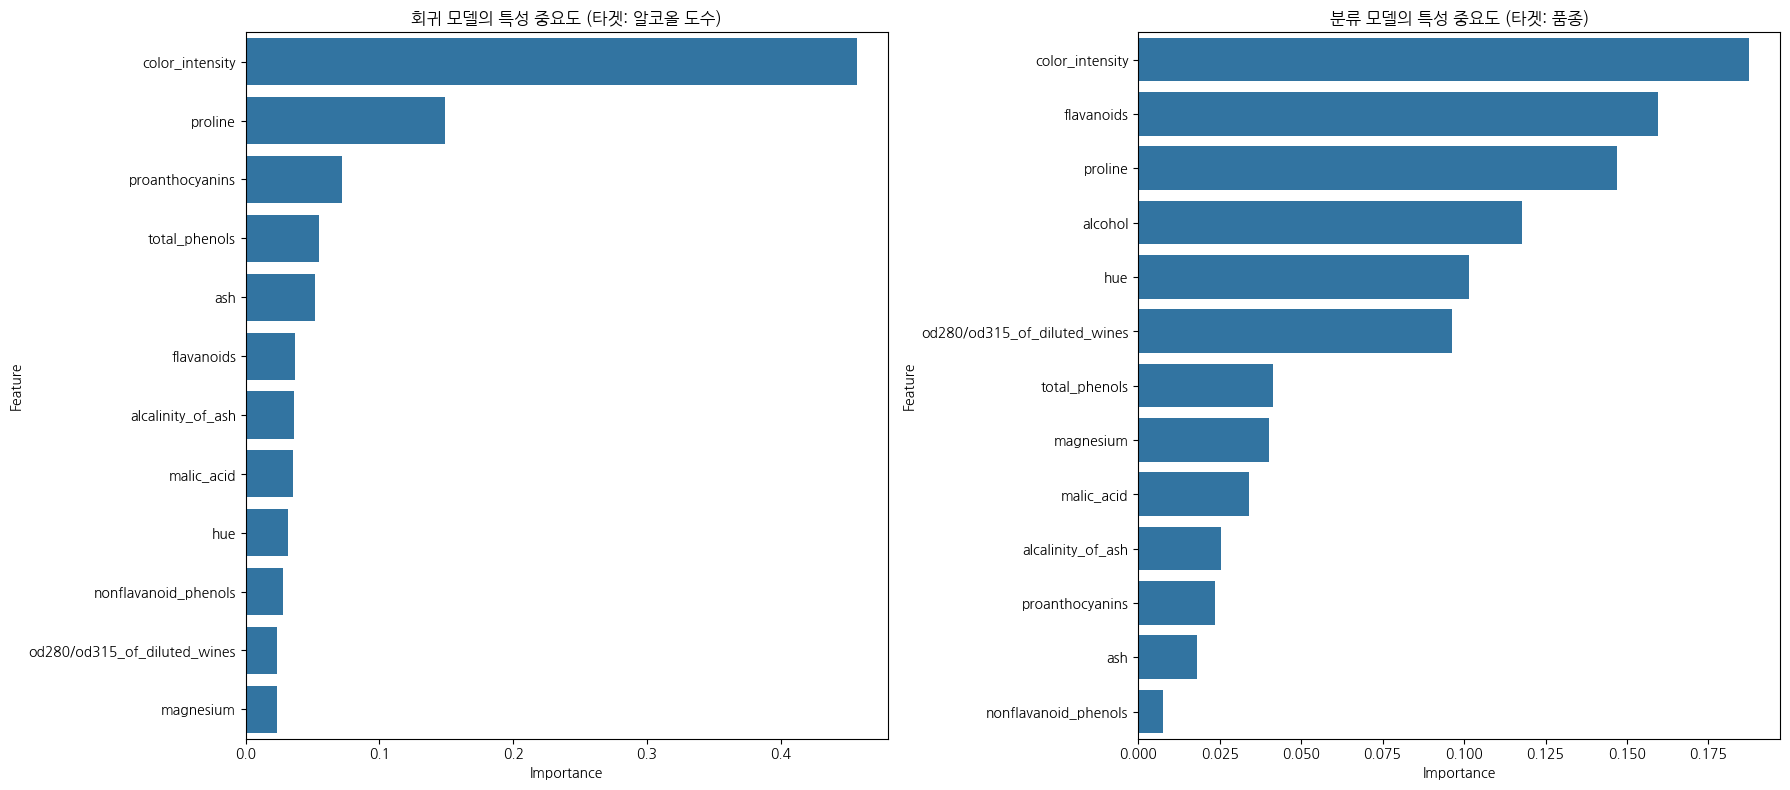

In [26]:
# 1. 회귀 모델의 특성 중요도 분석
importances_reg = model_rfr.feature_importances_
features_reg = X_train_reg.columns

imp_reg_df = (
    pd.DataFrame({
        'Feature': features_reg,
        'Importance': importances_reg
    })
    .sort_values(by='Importance', ascending=False)
)

# 2. 분류 모델의 특성 중요도 분석
importances_cls = model_rfc.feature_importances_
features_cls = X_train_cls.columns

imp_cls_df = (
    pd.DataFrame({
        'Feature': features_cls,
        'Importance': importances_cls
    })
    .sort_values(by='Importance', ascending=False)
)
# 3. 결과 시각화 비교
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(
    x='Importance',
    y='Feature',
    data=imp_reg_df,
    ax=axes[0]
)
axes[0].set_title('회귀 모델의 특성 중요도 (타겟: 알코올 도수)')

sns.barplot(
    x='Importance',
    y='Feature',
    data=imp_cls_df,
    ax=axes[1]
)
axes[1].set_title('분류 모델의 특성 중요도 (타겟: 품종)')

plt.tight_layout()
plt.show()



### 🤔 생각해 볼 문제:

1.  '알코올 도수'를 예측하는 데 가장 중요했던 상위 3개 변수는 무엇인가요?
2.  와인 '품종'을 예측하는 데 가장 중요했던 상위 3개 변수는 무엇인가요?
3.  두 문제의 특성 중요도가 다르게 나온 이유는 무엇일까요? 이 결과를 통해 우리는 무엇을 배울 수 있나요?

---

### 📢 발표 시 담으면 좋을 것들

Part 4를 맡은 팀은 **데이터 분석가**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** '특성 중요도'가 어떻게 복잡한 모델의 예측 근거를 이해하게 해주는 '블랙박스를 여는 열쇠' 역할을 하는지 강조합니다.
2.  **분석 결과 종합:** Part 2의 회귀 문제와 Part 3의 분류 문제의 최종 결과를 간략히 요약합니다. 이어서 두 문제에 대한 특성 중요도 그래프를 나란히 보여주며, 예측 목표에 따라 핵심 변수가 어떻게 달라지는지 시각적으로 설명합니다.
3.  **최종 결론 및 제언:** '우리가 무엇을 예측하고 싶은가에 따라 데이터의 같은 변수라도 그 중요성이 달라진다'는 점을 최종 결론으로 제시합니다. 이로부터 '비즈니스 문제 정의가 왜 데이터 분석의 가장 중요한 첫 단계인지'에 대해 토의를 이끌며 전체 프로젝트를 마무리합니다.




## 결과 해석

### 알코올 도수 예측에서 중요한 상위 변수

회귀 문제에서는 proline, color_intensity, malic_acid 등이 알코올 도수를 예측하는 데 가장 중요한 변수로 나타났다. 이는 알코올 도수가 와인의 농도나 색감과 밀접한 관련이 있음을 보여준다.

### 품종 예측에서 중요한 상위 변수

분류 문제에서는 flavanoids, proline, od280/od315_of_diluted_wines 등이 와인 품종을 구분하는 데 핵심적인 변수로 나타났다. 이는 품종별로 화학적 조성 차이가 명확히 존재함을 의미한다.

### 두 문제에서 중요도가 다르게 나온 이유

회귀 문제는 알코올 도수라는 연속적인 수치를 예측하는 것이 목표이므로, 농도와 직접적으로 관련된 변수가 중요하게 작용했다. 반면 분류 문제는 품종이라는 범주를 구분하는 것이 목표이기 때문에, 품종 간 차이를 잘 드러내는 화학 성분들이 더 중요하게 평가되었다.

이를 통해 같은 데이터라도 예측 목표에 따라 모델이 중요하게 사용하는 변수는 달라진다는 점을 확인할 수 있다.

---

## 발표용 정리 (Part 4)

### 핵심 개념 설명

특성 중요도는 모델이 예측을 할 때 어떤 변수를 더 많이 참고했는지를 보여주는 지표이다. 특히 랜덤 포레스트와 같은 복잡한 모델에서 특성 중요도는 모델의 내부 동작을 이해할 수 있게 해 주는 블랙박스를 여는 열쇠 역할을 한다.

### 분석 결과 종합

Part 2의 회귀 문제에서는 알코올 도수를 예측하기 위해 농도와 색감 관련 변수가 중요하게 작용했다. Part 3의 분류 문제에서는 품종 간 차이를 설명하는 화학 성분들이 핵심 변수로 나타났다. 두 특성 중요도 그래프를 비교하면, 같은 변수라도 문제 정의에 따라 역할이 달라진다는 점을 시각적으로 확인할 수 있다.

### 최종 결론 및 제언

이번 분석을 통해 우리가 무엇을 예측하고 싶은지에 따라 데이터에서 중요하게 해석해야 할 변수는 달라진다는 점을 알 수 있었다. 따라서 데이터 분석의 가장 중요한 첫 단계는 모델 선택이 아니라 비즈니스 문제를 명확히 정의하는 것이다. 이 점을 바탕으로 전체 프로젝트를 마무리할 수 있다.
